In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [19]:
data = pd.read_csv('results_combined.csv', index_col=[0])

# Multinomial Logistic Regression

In [20]:
multinomial = data[data['result'] != data['multinomial_result']].drop(columns=['knn_result', 'tree_result'])
multinomial

,season,round,home_club_position,away_club_position,home_club_cum_goals,away_club_cum_goals,home_club_cum_concede,away_club_cum_concede,home_recent_result,away_recent_result,result,multinomial_result
1,2013,2,3,5,4,2,1,0,3,3,0,1
4,2013,2,14,17,2,0,2,1,1,0,0,1
6,2013,2,6,16,1,0,0,1,3,0,0,1
7,2013,2,18,4,0,2,4,0,0,3,0,-1
18,2013,3,11,15,3,2,4,2,3,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3694,2022,38,20,5,32,71,69,43,0,13,0,-1
3695,2022,38,12,4,37,67,46,32,4,8,0,-1
3696,2022,38,17,15,33,37,57,70,5,6,1,-1
3697,2022,38,7,6,49,71,45,51,7,9,1,-1


In [21]:
multinomial[multinomial['multinomial_result'] == -1][['home_club_position', 'away_club_position', 'result']].value_counts().sort_index()
# multinomial[multinomial['multinomial_result'] == 0][['home_club_position', 'away_club_position', 'result']].value_counts().sort_index()
# multinomial[multinomial['multinomial_result'] == 1][['home_club_position', 'away_club_position', 'result']].value_counts().sort_index()

home_club_position  away_club_position  result
1                   3                   1         1
                    4                   0         1
2                   3                   0         1
                                        1         2
                    4                   1         1
                                                 ..
20                  14                  0         4
                    15                  0         1
                                        1         1
                    16                  0         2
                    17                  1         1
Name: count, Length: 309, dtype: int64

# KNN

In [22]:
knn = data[data['result'] != data['knn_result']].drop(columns=['multinomial_result', 'tree_result'])
knn

,season,round,home_club_position,away_club_position,home_club_cum_goals,away_club_cum_goals,home_club_cum_concede,away_club_cum_concede,home_recent_result,away_recent_result,result,knn_result
1,2013,2,3,5,4,2,1,0,3,3,0,1
3,2013,2,11,7,0,4,2,0,0,3,1,-1
4,2013,2,14,17,2,0,2,1,1,0,0,1
6,2013,2,6,16,1,0,0,1,3,0,0,1
7,2013,2,18,4,0,2,4,0,0,3,0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...
3694,2022,38,20,5,32,71,69,43,0,13,0,-1
3695,2022,38,12,4,37,67,46,32,4,8,0,-1
3696,2022,38,17,15,33,37,57,70,5,6,1,0
3697,2022,38,7,6,49,71,45,51,7,9,1,-1


In [23]:
# knn[knn['knn_result'] == -1][['home_club_position', 'away_club_position', 'result']].value_counts().sort_index()
# knn[knn['knn_result'] == 0]['difference'].sort_index()
# knn[knn['knn_result'] == 1][['home_club_position', 'away_club_position', 'result']].value_counts().sort_index()

# Decision Tree

In [24]:
tree = data[data['result'] != data['tree_result']].drop(columns=['multinomial_result', 'knn_result'])
tree

,season,round,home_club_position,away_club_position,home_club_cum_goals,away_club_cum_goals,home_club_cum_concede,away_club_cum_concede,home_recent_result,away_recent_result,result,tree_result
1,2013,2,3,5,4,2,1,0,3,3,0,1
3,2013,2,11,7,0,4,2,0,0,3,1,-1
4,2013,2,14,17,2,0,2,1,1,0,0,1
6,2013,2,6,16,1,0,0,1,3,0,0,1
7,2013,2,18,4,0,2,4,0,0,3,0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...
3690,2022,38,11,16,39,37,48,67,7,10,0,1
3694,2022,38,20,5,32,71,69,43,0,13,0,-1
3695,2022,38,12,4,37,67,46,32,4,8,0,-1
3696,2022,38,17,15,33,37,57,70,5,6,1,-1


In [25]:
# tree[tree['tree_result'] == -1][['home_club_position', 'away_club_position', 'result']].value_counts().sort_index()
tree[tree['tree_result'] == 0][['home_club_position', 'away_club_position', 'result']].value_counts().sort_index()
# tree[tree['tree_result'] == 1][['home_club_position', 'away_club_position', 'result']].value_counts().sort_index()

home_club_position  away_club_position  result
2                   12                   1        1
3                   16                   1        1
                    17                   1        1
4                   17                   1        1
6                   20                   1        1
7                   19                   1        1
9                   16                   1        1
10                  12                  -1        1
12                  17                   1        1
                    19                   1        1
13                  12                  -1        1
                    20                   1        1
15                  13                   1        1
17                  12                   1        1
                    13                  -1        1
19                  16                   1        1
Name: count, dtype: int64

# Overall

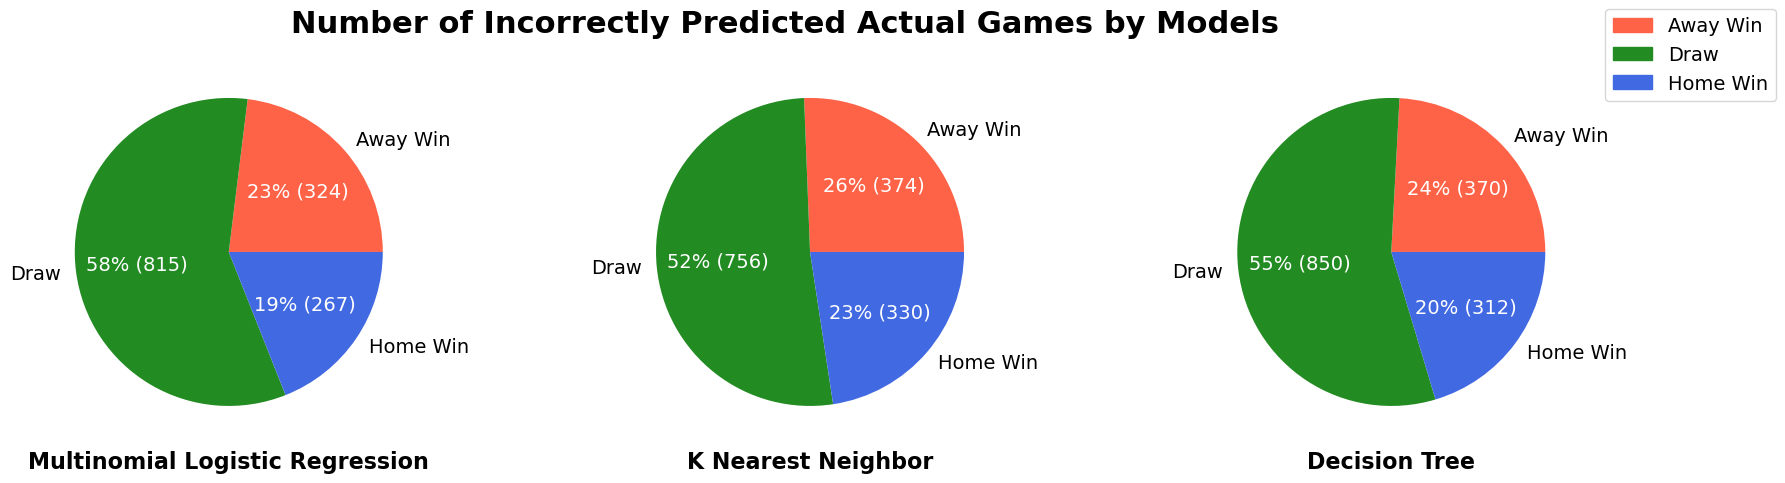

In [26]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Assuming multinomial, knn, and tree are your dataframes
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, subplot_kw={'aspect': 'equal'}, figsize=(20, 5))

# Define colors for the pie charts
colors = ['tomato', 'forestgreen', 'royalblue']

# Function to format autopct with both count and percentage
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.0f}% ({v:d})'.format(p=pct,v=val)
    return my_autopct

# Pie chart for Multinomial Logistic Regression
values1 = multinomial['result'].value_counts().sort_index()
pie1, texts1, autotexts1 = ax1.pie(values1, labels=['Away Win', "Draw", "Home Win"], autopct=make_autopct(values1), colors=colors, textprops={'fontsize': 14})
ax1.set_xlabel("Multinomial Logistic Regression", fontsize=16, weight='bold')

# Pie chart for K Nearest Neighbor
values2 = knn['result'].value_counts().sort_index()
pie2, texts2, autotexts2 = ax2.pie(values2, labels=['Away Win', "Draw", "Home Win"], autopct=make_autopct(values2), colors=colors, textprops={'fontsize': 14})
ax2.set_xlabel("K Nearest Neighbor", fontsize=16, weight='bold')

# Pie chart for Decision Tree
values3 = tree['result'].value_counts().sort_index()
pie3, texts3, autotexts3 = ax3.pie(values3, labels=['Away Win', "Draw", "Home Win"], autopct=make_autopct(values3), colors=colors, textprops={'fontsize': 14})
ax3.set_xlabel("Decision Tree", fontsize=16, weight='bold')

# Increase the font size of autopct text
for autotext in autotexts1 + autotexts2 + autotexts3:
    autotext.set_fontsize(14)
    autotext.set_color("white")
    # plt.setp(autotext, weight="bold")

# Create legend items with the specified colors
legend_items = [mpatches.Patch(color=color, label=label) for color, label in zip(colors, ['Away Win', 'Draw', 'Home Win'])]

# Add a common legend
fig.legend(handles=legend_items, loc='upper right', fontsize=14)

fig.suptitle("Number of Incorrectly Predicted Actual Games by Models", fontsize=22, weight='bold')

plt.subplots_adjust(wspace=0.5)
plt.show()


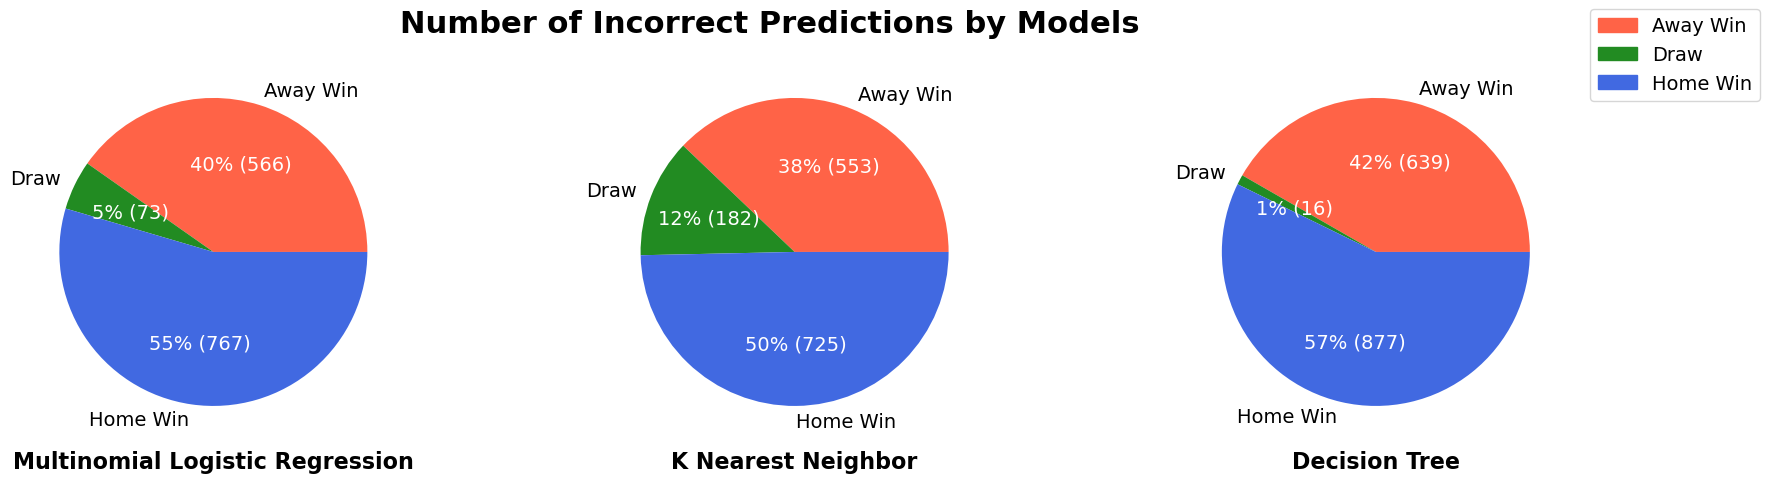

In [27]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Assuming multinomial, knn, and tree are your dataframes
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, subplot_kw={'aspect': 'equal'}, figsize=(20, 5))

# Define colors for the pie charts
colors = ['tomato', 'forestgreen', 'royalblue']

# Function to format autopct with both count and percentage
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.0f}% ({v:d})'.format(p=pct,v=val)
    return my_autopct

# Pie chart for Multinomial Logistic Regression
values1 = multinomial['multinomial_result'].value_counts().sort_index()
pie1, texts1, autotexts1 = ax1.pie(values1, labels=['Away Win', "Draw", "Home Win"], autopct=make_autopct(values1), colors=colors, textprops={'fontsize': 14})
ax1.set_xlabel("Multinomial Logistic Regression", fontsize=16, weight='bold')

# Pie chart for K Nearest Neighbor
values2 = knn['knn_result'].value_counts().sort_index()
pie2, texts2, autotexts2 = ax2.pie(values2, labels=['Away Win', "Draw", "Home Win"], autopct=make_autopct(values2), colors=colors, textprops={'fontsize': 14})
ax2.set_xlabel("K Nearest Neighbor", fontsize=16, weight='bold')

# Pie chart for Decision Tree
values3 = tree['tree_result'].value_counts().sort_index()
pie3, texts3, autotexts3 = ax3.pie(values3, labels=['Away Win', "Draw", "Home Win"], autopct=make_autopct(values3), colors=colors, textprops={'fontsize': 14})
ax3.set_xlabel("Decision Tree", fontsize=16, weight='bold')

# Increase the font size of autopct text
for autotext in autotexts1 + autotexts2 + autotexts3:
    autotext.set_fontsize(14)
    autotext.set_color("white")
    # plt.setp(autotext, weight="bold")

# Create legend items with the specified colors
legend_items = [mpatches.Patch(color=color, label=label) for color, label in zip(colors, ['Away Win', 'Draw', 'Home Win'])]

# Add a common legend
fig.legend(handles=legend_items, loc='upper right', fontsize=14)

fig.suptitle("Number of Incorrect Predictions by Models", fontsize=22, weight='bold')

plt.subplots_adjust(wspace=0.5)
plt.show()


# Analysis

- What are the common traits for the matches that are unpredictable with machine learning models?

Considering Feature Importance (Calculated by absolute value of coefficients in MLR / Functional Value in Decision Tree) --> Similar Traits

- Home / Away Win, The opponent is placed at higher position at the league (Regardless of the round)
- Draw, Both teams are placed below 10
- Predictions Mainly on Win / Loses, not on Draw (as seen through recall rate), imbalanced Dataset

KNN --> Different
- Comparatively More Predictions on Draw but with lower precision
- Overfitting